## DecisionTree_Regressor_Classifier_50_startup_company

#### Import Libraries

In [765]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import Datasets

In [766]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Dataset\\50_Startups.csv')

In [767]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


##### Info

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### when we perform model on D.T ,  always keep in mind , 

#### 1.when less D.T. then not need to treate the outliers. if D.T is high then need to treate the outliers.
#### because large tree has overfitting issue so to avoid overfitting we do oulier treatment
#### 2.When we doing Encoding then we not use OneHotEncode....... because OneHot is use when linear model
#### 3.Feature Scaling is not used in D.T because Tree based model and tree based model is allocating whether that model is represent or not

#### Check ambiguity data

In [769]:
for col in df.columns:
    
    print('***************************',col,'**********************************')
    
    print()
    print()
    
    print(set(df[col].to_list()))
    
    print()
    print()

*************************** R&D Spend **********************************


{0.0, 66051.52, 20229.59, 119943.24, 73994.56, 15505.73, 86419.7, 64664.71, 101913.08, 142107.34, 38558.51, 542.05, 22177.74, 1315.46, 131876.9, 162597.7, 44069.95, 93863.75, 61994.48, 72107.6, 63408.86, 78389.47, 78013.11, 46014.02, 100671.96, 75328.87, 94657.16, 65605.48, 123334.88, 55493.95, 67532.53, 61136.38, 28754.33, 134615.46, 91992.39, 23640.93, 46426.07, 114523.61, 76253.86, 120542.52, 153441.51, 165349.2, 91749.16, 1000.23, 144372.41, 77044.01, 27892.92, 28663.76, 130298.13}


*************************** Administration **********************************


{110594.11, 156547.42, 135426.92, 108679.17, 144135.98, 91790.61, 118671.85, 103057.49, 118546.05, 152701.92, 127382.3, 105751.03, 101145.55, 65947.93, 122782.75, 51743.15, 139553.16, 91391.77, 82982.09, 153514.11, 153773.43, 157693.92, 145077.58, 154806.14, 85047.44, 115641.28, 96189.63, 136897.8, 129219.61, 135495.07, 153032.06, 113867.3, 127056.21

##### Insights : There is no any ambiguity value

### Data Preprocessing

### 1. Handling Missing values

In [770]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Insights : There is no missing values

### 2. Handling characters(Encoding)

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Make Category

In [772]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [773]:
df['State'] = df['State'].astype('category')

In [774]:
df['State'] = df['State'].cat.codes

#### After treating category

In [775]:
df['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [776]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,2,192261.83
1,162597.7,151377.59,443898.53,0,191792.06


#### 3.Handling Outliers

##### Here only 4 features and 1 target variable so tree splitted is very less . so thats why we are not treating outliers

#### splt data into independent and dependent variable

In [777]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [778]:
x.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,2
1,162597.7,151377.59,443898.53,0


In [779]:
y.head(2)

0    192261.83
1    191792.06
Name: Profit, dtype: float64

#### split data into train test split

In [780]:
from sklearn.model_selection import train_test_split

In [781]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.25 , random_state = 1)

In [782]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(37, 4) (13, 4) (37,) (13,)


#### Building DecisionTree Model

In [783]:
from sklearn.tree import DecisionTreeRegressor

In [784]:
dt = DecisionTreeRegressor()

In [785]:
dt

DecisionTreeRegressor()

In [786]:
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [787]:
y_train_pred_dt = dt.predict(x_train)

In [788]:
y_train_pred_dt

array([ 90708.19, 122776.86,  71498.49,  14681.4 , 105733.54, 110352.25,
       134307.35,  77798.83, 125370.37,  64926.08, 108552.04, 108733.99,
       166187.94,  96778.92, 132602.65,  99937.59, 146121.95, 103282.38,
        65200.33,  96712.8 , 124266.9 , 118474.03, 107404.34, 156122.51,
       155752.6 ,  42559.73, 191792.06, 126992.93, 192261.83, 129917.04,
       156991.12, 144259.4 , 149759.96, 152211.77, 141585.52,  69758.98,
        89949.14])

#### Training Accuracy

In [789]:
from sklearn.metrics import r2_score

In [790]:
training_accuracy_dt = r2_score(y_train , y_train_pred_dt)

In [791]:
training_accuracy_dt

1.0

#### Testing Model

In [792]:
dt.fit(x_test , y_test)

DecisionTreeRegressor()

In [793]:
y_test_pred_dt = dt.predict(x_test)

In [794]:
y_test_pred_dt

array([105008.31,  96479.51,  78239.91,  81229.06, 191050.39, 182901.99,
        35673.41, 101004.64,  49490.75,  97483.56,  97427.84,  81005.76,
       111313.02])

#### Testing Accuracy

In [795]:
testing_accuracy_dt = r2_score(y_test , y_test_pred_dt)

In [796]:
testing_accuracy_dt

1.0

##### We get training accuracy is 1.0 and testing accuracy is 1.0

#### Here we get training accuracy 100 % and testing accuracy is 100%. so it is not possible to accuracy 100 % . so thats why we are not not go with resgressor model with decision Tree  

##### when we have regressor problem statement then avoid to use of DecisionTreeRegressor because it has overfitting problem

#### Cross val method to reduce overfitting (overfitting is the 100% training accuracy and 100% testing accuracy)

In [797]:
from sklearn.model_selection import cross_val_score

In [798]:
cs = cross_val_score(dt , x_train , y_train , cv = 10)

In [799]:
cs

array([  0.42443097,   0.87181169,   0.58740831,   0.86546022,
         0.96634384,   0.26438253,   0.92993926,   0.88695806,
       -21.22435468,   0.92581792])

In [800]:
cs.mean()

-1.4501801887358723

In [801]:
cs.max()

0.9663438399901733

##### Insights : Yes still our model is facing overfitting because it has more than 10 % variance in mean and max accuracy.

##### Yes we are not accept Decision Tree model

#### Building Linear Regression Model

In [802]:
from sklearn.linear_model import LinearRegression

In [803]:
lm = LinearRegression()

In [804]:
lm.fit(x_train , y_train)

LinearRegression()

In [805]:
y_train_pred_lm = lm.predict(x_train)

In [806]:
y_train_pred_lm

array([ 77575.85523541, 115265.75157209,  71607.5874736 ,  50142.12725225,
       110881.25819955, 115528.32761095, 127131.5256427 ,  75819.43007822,
       130964.77555205,  50272.60032435, 112869.58189044, 110673.17584432,
       169564.27127849,  98500.65370748, 148942.48442919,  99325.4351463 ,
       134348.1784066 , 103234.81538195,  66435.17602548,  90986.8289602 ,
       128788.71049663, 116696.78860153, 102481.64612999, 155435.86727647,
       159090.38121303,  48615.00001668, 187284.96554226, 116884.91502809,
       191146.36774105, 145438.48165266, 162056.95690315, 133701.90432789,
       152790.86835724, 151653.01177778, 128882.55588733,  62442.4211287 ,
        88863.12790791])

##### Training Accuracy

In [807]:
from sklearn.metrics import r2_score

In [808]:
training_accuracy_lm = r2_score(y_train , y_train_pred_lm)

In [809]:
training_accuracy_lm

0.9419507593691141

#### Testing Model

In [810]:
lm.fit(x_test , y_test)

LinearRegression()

In [811]:
y_test_pred_lm = lm.predict(x_test)

#### Testing Accuracy

In [812]:
testing_accuracy_lm = r2_score(y_test , y_test_pred_lm)

In [813]:
testing_accuracy_lm

0.9786060672473249

#### We get very accurate model beacause training accuracy is 94.19507593691141 and testing accuracy is 97.86060672473249. we have variance is approximate 3 % . when we have 10 % variance is training and testing accuracy i.e. Most Accurate Model. But , In linear regression we are not go with accuracy only we need to satisfy the assumptions as well.

##### But when we followed Linear Regression Model approach. we have to satisfy assumptions
##### Like , 
#### 1.Endoginity
#### 2.Homoscadasticity
#### 3.Normality of residual
#### 4.Normal Linearity
#### 5.No Autocorrelation
#### 6.Multicollinearity

#### Here we are not satisfy the any assumptions

### RandomFoestRegressor Model

##### RandomFoestRegressor Model is avoid overfitting problem that occure in DecisionTree.

In [814]:
from sklearn.ensemble import RandomForestRegressor

In [815]:
rf = RandomForestRegressor(n_estimators = 500)

In [816]:
rf

RandomForestRegressor(n_estimators=500)

In [817]:
rf.fit(x_train , y_train)

RandomForestRegressor(n_estimators=500)

In [818]:
y_train_pred_rf = rf.predict(x_train)

In [819]:
y_train_pred_rf

array([ 85465.13406, 126803.0864 ,  72824.4812 ,  32815.30826,
       108578.20824, 110776.785  , 133693.62172,  80025.38614,
       128023.47328,  55937.66704, 114827.33538, 108726.5957 ,
       162080.2081 ,  97899.65114, 138894.10126, 102104.03706,
       143874.07044, 104218.18838,  65864.30536,  95486.2333 ,
       127975.39378, 115228.8326 , 106728.0304 , 152060.1868 ,
       155215.0895 ,  40140.79074, 187458.94058, 122745.37896,
       185204.2187 , 133324.15002, 157799.10518, 143486.36564,
       149626.63046, 146921.80336, 137723.09658,  67955.08632,
        91894.5069 ])

#### Training Accuracy Randomforest

In [820]:
training_accuracy_rf = r2_score(y_train , y_train_pred_rf)

In [821]:
training_accuracy_rf

0.9855464157006457

#### Testing Model RandomForest

In [822]:
rf.fit(x_test , y_test)

RandomForestRegressor(n_estimators=500)

In [823]:
y_test_pred_rf = rf.predict(x_test)

In [824]:
y_test_pred_rf

array([112956.43246,  91587.2502 ,  81436.19108,  78466.60596,
       179710.2026 , 176561.92364,  45472.4687 ,  99939.9208 ,
        59733.9114 ,  98319.57026,  96317.7478 ,  84464.68302,
       108905.00036])

#### Testing Acuuracy RandomForest

In [825]:
testing_accuracy_rf = r2_score(y_test , y_test_pred_rf)

In [826]:
testing_accuracy_rf

0.9786530244839216

#### Insights : Here we get training accuracy of randomforest is 98.60323628181251 and testing accuracy randomforest is 97.66426451744701

#### Here we choose randomForest Model because it does not having any assumptions for satisfying as compare to Linearregression(In linear regression we have assumptions for satisfying)

### When we have any overfitting problem always go with (Bagging) Randomforest and when we have underfitting problem then we use (Boosting) XGBoost.

# Classification Model on penguiens

#### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\penguins_lter.csv')

In [3]:
df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN


#### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    object 
 12  Body Mass (g)        342 non-null    object 
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

#### Prepruning : Rmove the unwanted branches(variables) from the dataset while data preprocessing

#### From visualising dataset . we get to know StudyName , Sample Number , Individual ID , Date Egg(it is need when time series forecasting], Comments are non significant variables, 

In [5]:
df.drop(columns = ['studyName' , 'Sample Number' ,'Individual ID' , 'Date Egg' , 'Comments'] , axis = 1 , inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    object 
 8   Body Mass (g)        342 non-null    object 
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(4), object(8)
memory usage: 32.4+ KB


### Data Preprocessing

#### 1. Handling the missing values

In [7]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

Species                0.000000
Region                 0.000000
Island                 0.000000
Stage                  0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
Delta 15 N (o/oo)      4.069767
Delta 13 C (o/oo)      3.779070
dtype: float64

#### Flipper Length and Body Mass(g) need from object to make numeric data because actually Its numeric data

##### Check ambiguity values

In [9]:
for col in df.columns:
    
    
    print('****************************' , col , '*************************')
    
    print()
    print()
    
    print(set(df[col].to_list()))
    
    print()
    print()
    
    

**************************** Species *************************


{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}


**************************** Region *************************


{'Anvers'}


**************************** Island *************************


{'Biscoe', 'Dream', 'Torgersen'}


**************************** Stage *************************


{'Adult, 1 Egg Stage'}


**************************** Clutch Completion *************************


{'No', 'Yes'}


**************************** Culmen Length (mm) *************************


{49.4, 49.9, 37.3, 45.7, 50.4, nan, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38

#### Insights : Flipper Length , Body Mass(g) and Sex having ambiguity value

#### Here we get '.' ambiguity value . so we are replaced those ambiguity value by mode because this variables (Flipper Length , Body Mass(g) and Sex are object i.e. characters )

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    object 
 8   Body Mass (g)        342 non-null    object 
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(4), object(8)
memory usage: 32.4+ KB


#### Flipper Length , Body Mass(g) and Sex

In [11]:
df['Flipper Length (mm)'].mode()

0    190
Name: Flipper Length (mm), dtype: object

In [12]:
df[df['Flipper Length (mm)'] == '.']

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302


#### use np.where for replace '.' by mode

In [13]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)'] == '.' , df['Flipper Length (mm)'].mode()[0] , df['Flipper Length (mm)'])

In [14]:
df['Body Mass (g)'].mode()

0    3800
Name: Body Mass (g), dtype: object

In [15]:
df[df['Body Mass (g)'] == '.']

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181,.,MALE,NaN,NaN


In [16]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)'] == '.' , df['Body Mass (g)'].mode()[0] , df['Body Mass (g)'])

In [17]:
df[df['Body Mass (g)']=='.']

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)


In [18]:
df[df['Sex']=='.']

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
336,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,44.5,15.7,217,4875,.,8.04111,-26.18444


In [19]:
df['Sex'] = np.where(df['Sex'] == '.' , df['Sex'].mode()[0] , df['Sex'])

In [20]:
df[df['Sex'] == '.']

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)


In [21]:
for col in df.columns:
    
    
    print('****************************' , col , '*************************')
    
    print()
    print()
    
    print(set(df[col].to_list()))
    
    print()
    print()
    
    

**************************** Species *************************


{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}


**************************** Region *************************


{'Anvers'}


**************************** Island *************************


{'Biscoe', 'Dream', 'Torgersen'}


**************************** Stage *************************


{'Adult, 1 Egg Stage'}


**************************** Clutch Completion *************************


{'No', 'Yes'}


**************************** Culmen Length (mm) *************************


{49.4, 49.9, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.7, 38.9, 39.5, 40.3, 42.0, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 44.0, 48.2, 45.0, nan, nan, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.

#### Flipper Length and Body Mass(g) need from object to make numeric data because actually Its numeric data

In [22]:
df[['Flipper Length (mm)' , 'Body Mass (g)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flipper Length (mm)  342 non-null    object
 1   Body Mass (g)        342 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [23]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [24]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [25]:
df[['Flipper Length (mm)' , 'Body Mass (g)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Flipper Length (mm)  342 non-null    float64
 1   Body Mass (g)        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


#### Check missing values 

In [26]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

#### There are 7 variables have missing data like Culmen Length (mm) , Culmen Depth (mm),Flipper Length (mm),    Body Mass (g),          Sex,              Delta 15 N (o/oo), Delta 13 C (o/oo)     

#### Numerical columns 

In [27]:
numerical_features = df[['Culmen Length (mm)' , 'Culmen Depth (mm)' , 'Flipper Length (mm)' , 'Body Mass (g)' , 'Delta 15 N (o/oo)' , 'Delta 13 C (o/oo)' ,'Delta 13 C (o/oo)']]

In [28]:
numerical_features.head(2)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Delta 13 C (o/oo)
0,39.1,18.7,181.0,3800.0,NaN,NaN,NaN
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454,-24.69454


#### categorical Feature

In [29]:
categorical_feature = df['Sex']

In [30]:
categorical_feature.head(2)

0      MALE
1    FEMALE
Name: Sex, dtype: object

#### Fill Missing values 

#### First categorical variable

In [31]:
df['Sex'].isnull().sum()

10

In [32]:
df['Sex'].value_counts()

MALE      169
FEMALE    165
Name: Sex, dtype: int64

In [33]:
df['Sex'].mode()[0]

'MALE'

In [34]:
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

In [35]:
df['Sex'].isnull().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  344 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


#### For checking distributions of numerical features for imputing by median or mean

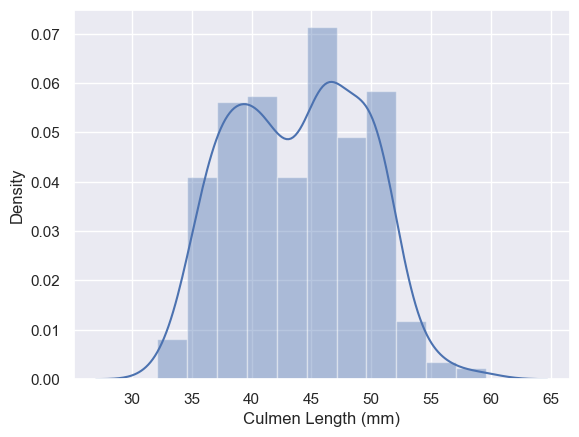

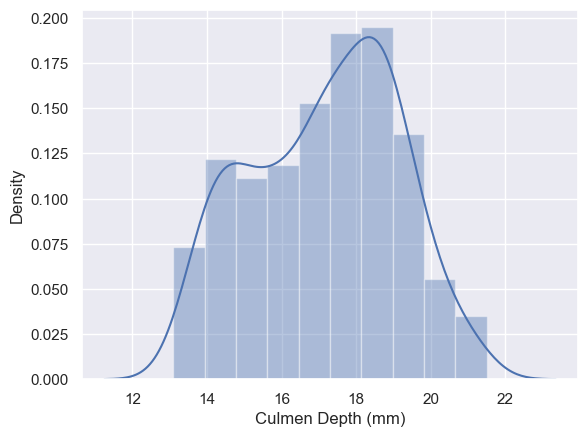

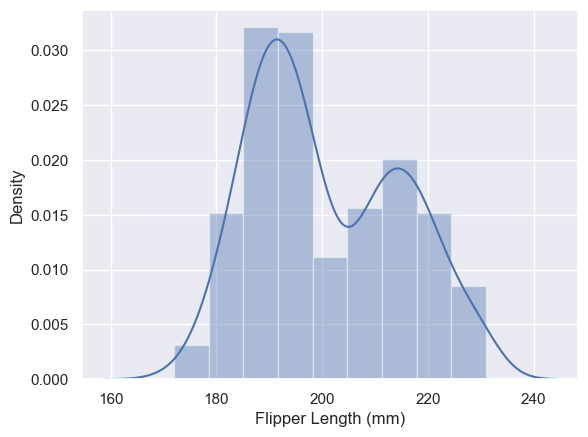

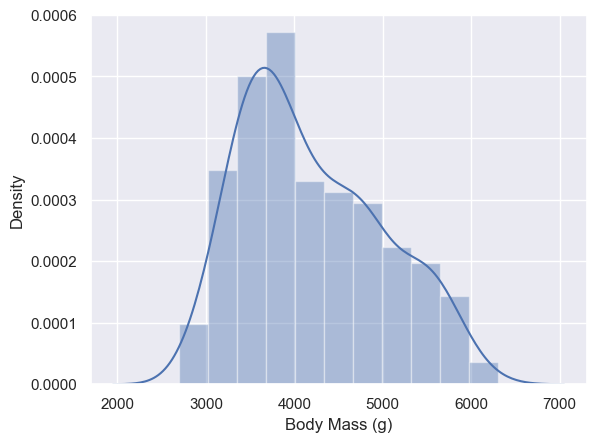

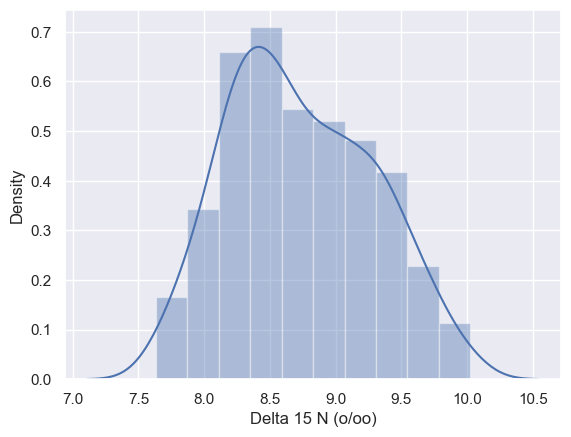

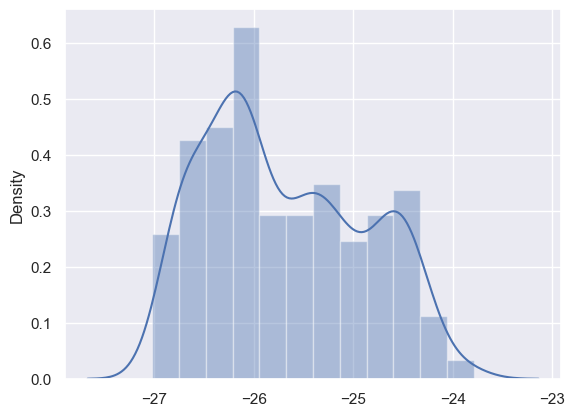

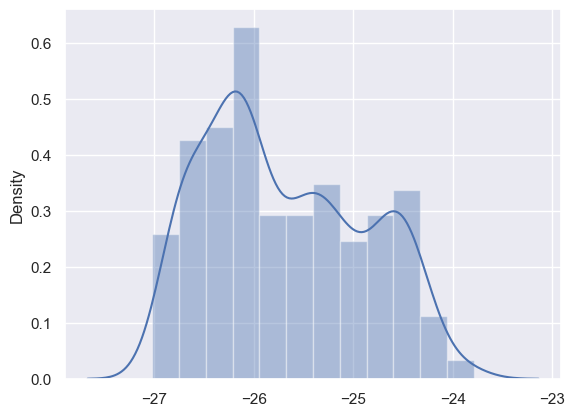

In [37]:
for col in numerical_features:
    #print(col)
    
    sns.distplot(numerical_features[col])
    plt.show()

#### Describe

In [38]:
numerical_features.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Delta 13 C (o/oo)
count,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000,331.000000
mean,43.921930,17.151170,200.900585,4201.900585,8.733382,-25.686292,-25.686292
std,5.459584,1.974793,14.070478,801.876492,0.551770,0.793961,0.793961
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305,-26.320305
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520,-25.833520
75%,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050,-25.062050
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670,-23.787670


#### Insights : Most of features are more or close to normal distribution but not exactly normal distribution so we impute it by median only

### Simple Imputer  : For to impute the missing values

In [39]:
df.head(1)

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3800.0,MALE,NaN,NaN


#### split the data into dependent and independent variable

In [40]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [41]:
x.head(1)

,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3800.0,MALE,NaN,NaN


In [42]:
y.head(1)

0    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

##### Numerical fearures

In [43]:
numerical_features = ['Culmen Length (mm)' , 'Culmen Depth (mm)' , 'Flipper Length (mm)' , 'Body Mass (g)' , 'Delta 15 N (o/oo)' , 'Delta 13 C (o/oo)' ,'Delta 13 C (o/oo)']

#### Characters features

In [44]:
characters_features = ['Species' , 'Region' ,'Island' ,'Stage' ,'Clutch Completion' , 'Sex']

##### Simple Imputer : For to impute the missing values

In [45]:
df[numerical_features].isnull().sum()

Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
Delta 13 C (o/oo)      13
dtype: int64

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
impute = SimpleImputer(missing_values = np.nan , strategy='median',)

In [48]:
df[numerical_features] = impute.fit_transform(df[numerical_features])

In [49]:
df[numerical_features].isnull().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [50]:
df[characters_features].isnull().sum()

Species              0
Region               0
Island               0
Stage                0
Clutch Completion    0
Sex                  0
dtype: int64

##### Insights : Done with missing values

### 2. Handling Characters(Encoding)

In [51]:
df.head(2)

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3800.0,MALE,8.652405,-25.83352
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,FEMALE,8.949560,-24.69454


#### We are already make char features list so we can encding it at once only

In [52]:
df[characters_features].head(2)

,Species,Region,Island,Stage,Clutch Completion,Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,FEMALE


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label = LabelEncoder()

In [55]:
for feature in df[characters_features]:
    
    df[feature] =  label.fit_transform(df[feature])

In [56]:
df.head(2)

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2,0,1,39.1,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,0,2,0,1,39.5,17.4,186.0,3800.0,0,8.949560,-24.69454


### 3.Handling Outliers

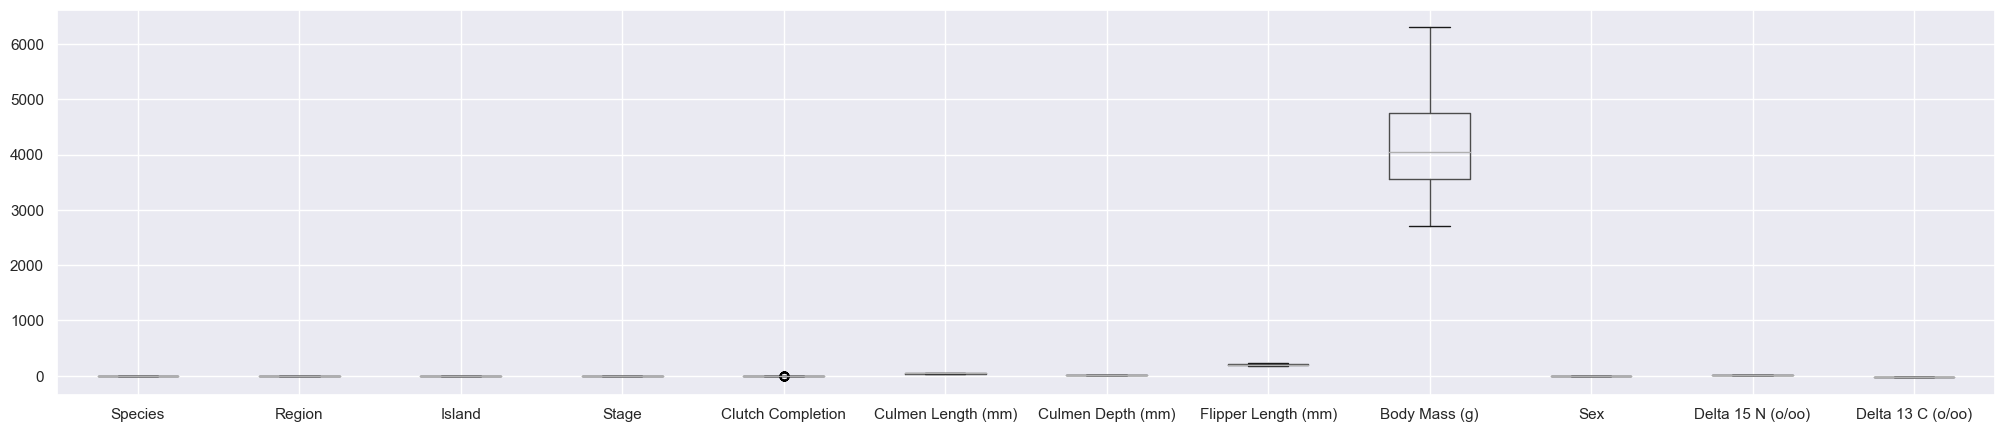

In [57]:
plt.figure(figsize = (25,5))
df.boxplot()
plt.show()

In [58]:
df['Clutch Completion'].value_counts()

1    308
0     36
Name: Clutch Completion, dtype: int64

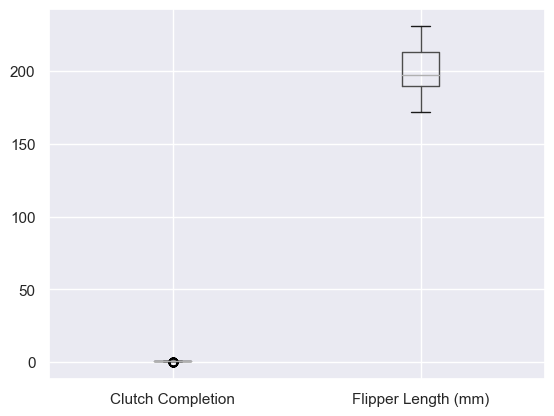

In [59]:
df[['Clutch Completion' , 'Flipper Length (mm)']].boxplot()
plt.show()

#### Insights : Only Clutch Completion has look like ouliers but it is not actually . if it is then also not an issue becuase its categorical feature so no need to treate outliers on it

#### Granular Analysis

In [60]:
#plt.figure(figsize = (5,10))
# sns.pairplot(df , hue = 'Species')
# plt.show()

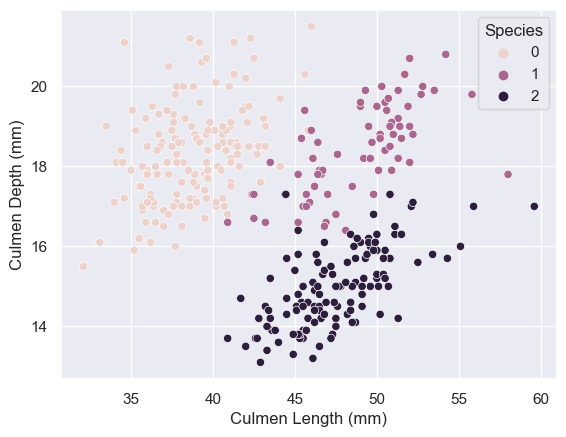

In [61]:
sns.scatterplot(data = df , x = 'Culmen Length (mm)' , y = 'Culmen Depth (mm)' , hue = 'Species' )
plt.show()

#### Insights : DT follows nested if else approach. Here , CL< 45 and CD > 16 i.e y = 0 , CL > 45 and CD >16 i.e. y = 1 and CL > 40 and CD < 16 i.e. y = 2.

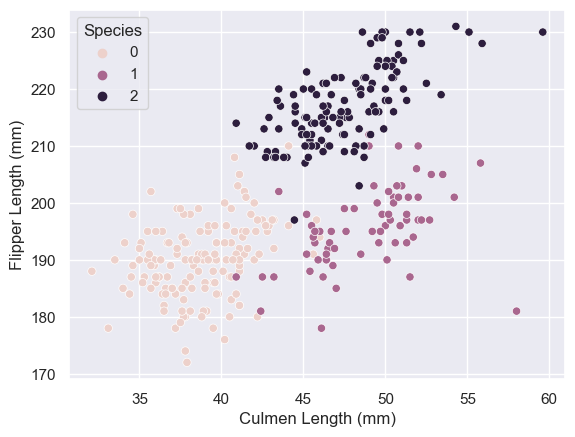

In [62]:
sns.scatterplot(data = df , x = 'Culmen Length (mm)' , y = 'Flipper Length (mm)' , hue = 'Species')
plt.show()

#### Insights : DT follows nested if else approach. Here , CL< 45 and FL < 200 i.e y = 0 , CL > 45 and FL <210 i.e. y = 1 and CL > 40 and FL > 200 i.e. y = 2.

In [63]:
df.columns

Index(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

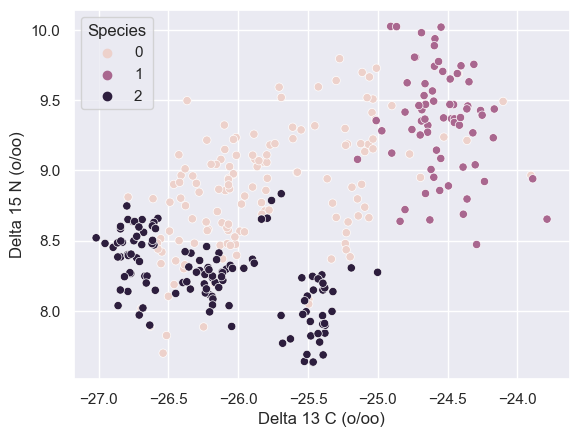

In [64]:
sns.scatterplot(data = df , x = 'Delta 13 C (o/oo)' , y = 'Delta 15 N (o/oo)' , hue = 'Species' )
plt.show()

#### Insights : DT follows nested if else approach. Here , Delta 13 c < -25.5 and Delta 15 N < 8.5 i.e y = 2 , Delta 13 c > -25.0 and Delta 15 N > 8.5 i.e. y = 1 and Delta 13 c > -26.5 and Delta 15 N > 8.5 i.e. y = 2.

#### Heatmap for correlation

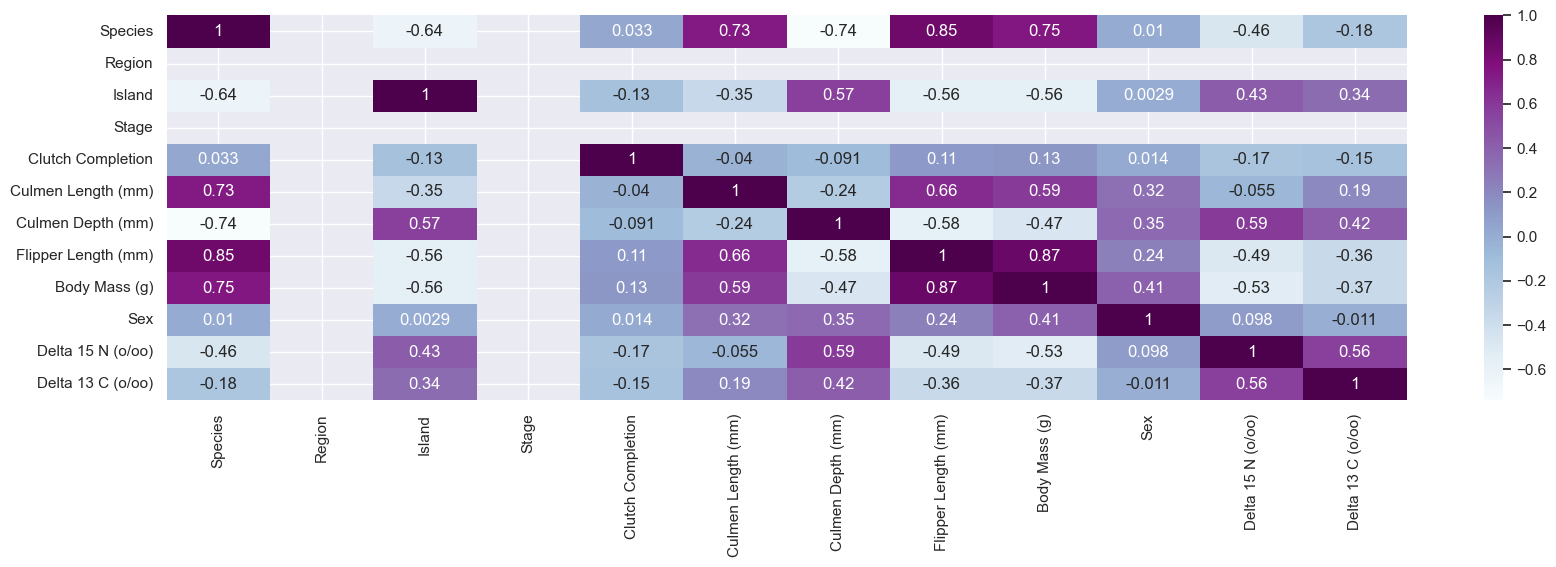

In [65]:
plt.figure(figsize = (20,5) )
sns.heatmap(df.corr() , annot = True , cmap = 'BuPu' , cbar = True)
plt.show()

#### Insights : In DT , There is no need to find the nulticollinearity . because DT is Non parametric algoithm. means its Non Linear. Non Linear has no any assumptions. we find the multicollinearity in Linear regression because LR has No multicollinearity assumption is there. so need to satisfy the assumption thats why we find there. but bo need to here

#### Multivariate Analysis

#### catplot

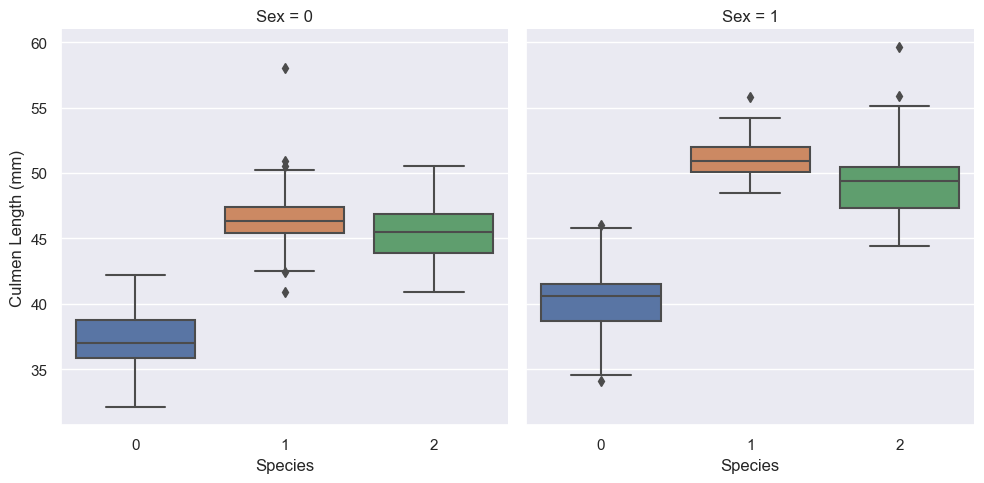

In [66]:
sns.catplot(data = df  , x = 'Species' , y = 'Culmen Length (mm)' , col =  'Sex' , kind = 'box')
plt.show()

##### Insights : we get know , 0 is female , in female if Cl is less than 45 then species is 0. if CL > 40(but its have outliers its not fixed) then species is 1. if CL is greater than 40 and CL < 50 then species is 2.
##### 1 is male , in male if CL is less than 45 then species is 0. if CL > 50 (but its have outliers its not fixed) then species is 1. if CL is greater than 45 then species is 2.

##### Split the Data in independent and dependent variable

In [67]:
df.head(2)

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2,0,1,39.1,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,0,2,0,1,39.5,17.4,186.0,3800.0,0,8.949560,-24.69454


In [68]:
x = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [69]:
x.head(2)

,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,2,0,1,39.1,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,2,0,1,39.5,17.4,186.0,3800.0,0,8.949560,-24.69454


In [70]:
y.head(2)

0    0
1    0
Name: Species, dtype: int32

#### Check Imbalance or Balance Data

In [71]:
df['Species'].value_counts()

0    152
2    124
1     68
Name: Species, dtype: int64

In [72]:
minority_class = 68
majority_class = 152

In [73]:
if minority_class * 2 <= majority_class:
    print('Imbalance Data')
    
else:
    
    print('Balance Data')

Imbalance Data


#### Insights : Data is Imbalance.then we need to data balance

#### We doing oversampling  here

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
resample = RandomOverSampler()

In [76]:
x_over , y_over = resample.fit_resample(x , y)

In [77]:
print('count before oversampling :')
print('*' * 50)
print( y.value_counts())
print()
print()
print('count after the oversampling :')
print('*' * 50)
print( y_over.value_counts())

count before oversampling :
**************************************************
0    152
2    124
1     68
Name: Species, dtype: int64


count after the oversampling :
**************************************************
0    152
1    152
2    152
Name: Species, dtype: int64


#### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

#### we passing balanced data in train test split

In [79]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.25 , random_state = 2 , stratify = y_over)

In [80]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape )

(342, 11) (114, 11) (342,) (114,)


### Buiding Decision Tree model

In [81]:
from sklearn.tree import DecisionTreeClassifier

#### approach 1 : ginni

In [82]:
dt1 = DecisionTreeClassifier(criterion='gini')

# train the dt1 model for thats why we use train data
dt1.fit(x_train , y_train)

DecisionTreeClassifier()

#### approach 2 : Entropy

In [83]:
dt2 = DecisionTreeClassifier(criterion= 'entropy')
# train the dt2 model for thats why we use train data
dt2.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

#### predict the train and test data of dt1

In [84]:
y_train_pred_dt1 = dt1.predict(x_train)
y_test_pred_dt1 = dt1.predict(x_test)

#### predict the train and test data of dt2

In [85]:
y_train_pred_dt2 = dt2.predict(x_train)
y_test_pred_dt2 = dt2.predict(x_test)

### Performance Evaluation Matrix

In [86]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , f1_score

### Classification report

##### Classification report of dt1(ginni)

##### train

In [87]:
print(classification_report(y_train , y_train_pred_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342



##### test

In [88]:
print(classification_report(y_test , y_test_pred_dt1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.93      1.00      0.96        38
           2       1.00      0.92      0.96        38

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Classification report of dt2(entropy)

##### Train data

In [89]:
print(classification_report(y_train , y_train_pred_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342



#### Test

In [90]:
print(classification_report(y_test , y_test_pred_dt2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.95      1.00      0.97        38
           2       1.00      0.95      0.97        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Gini index give best results so thats why we choose criterion as gini

### confusion matrix

##### conusion matrix on dt1

#### Train data

In [91]:
confusion_matrix(y_train , y_train_pred_dt1)

array([[114,   0,   0],
       [  0, 114,   0],
       [  0,   0, 114]], dtype=int64)

##### Test data

In [92]:
confusion_matrix(y_test , y_test_pred_dt1)

array([[37,  1,  0],
       [ 0, 38,  0],
       [ 1,  2, 35]], dtype=int64)

##### Insights : Fp :1 and FN : 1 and FNeutral : 1 so thats why we get 97 % accuracy and 3 % variance

##### confusion matrix of dt2

##### Train data

In [93]:
confusion_matrix(y_train , y_train_pred_dt2)

array([[114,   0,   0],
       [  0, 114,   0],
       [  0,   0, 114]], dtype=int64)

##### Test data

In [94]:
confusion_matrix(y_test , y_test_pred_dt2)

array([[37,  1,  0],
       [ 0, 38,  0],
       [ 1,  1, 36]], dtype=int64)

##### Insights : Fp :2 and FN : 2 and FNeutral : 1 so thats why we get 95.61 % accuracy and 5 % variance

### Accuracy Score

#### Accuracy score of dt1(ginni)

#### training Accuracy of ginni(dt1)

In [95]:
accuracy_score(y_train, y_train_pred_dt1)

1.0

#### testing Accuracy of ginni(dt1)

In [96]:
accuracy_score(y_test, y_test_pred_dt1)

0.9649122807017544

#### Accuracy score of dt2(entropy)

#### training Accuracy of entropy(dt2)

In [97]:
accuracy_score(y_train, y_train_pred_dt2)

1.0

#### testing Accuracy of entropy(dt2)

In [98]:
accuracy_score(y_test, y_test_pred_dt2)

0.9736842105263158

### Cross validation : For to reduce 100 % from train

#### Cross validation is for train data only . not for test data

In [99]:
from sklearn.model_selection import cross_val_score

#### we are selecting gini model(dt1) because it is better than entropy 

In [100]:
cs = cross_val_score(dt1 , x_train , y_train , cv = 10)

In [101]:
cs

array([0.97142857, 0.97142857, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97058824, 1.        ])

#### min accuracy

In [102]:
cs.min()

0.9705882352941176

#### avg accuracy

In [103]:
cs.mean()

0.9913445378151261

#### max accuracy

In [104]:
cs.max()

1.0

##### Always go with avg accuracy in cross validation(if model is getting overfit then we evaluate with cross val then there if we get avg accuracy(97%) which is reduce than whatever we get before that(100%).then there always go with avg accuracy so model is not get overfitted)

##### insights : variance in mean and max is 3 % only so model is not overfitted . so go with avg accuracy(97.95)

##### we are able to reduce the training accuracy of dt1 model(gini) from 100 % to 97 %.so model is not get overfitted.

##### Insights : Training Accuracy of dt1 model(gini) : 97.95798319327732 % and testing accuracy of dt1 model(gini) : 97.36842105263158 %. 

### confusion matrix on gini

#### cm Test model of gini

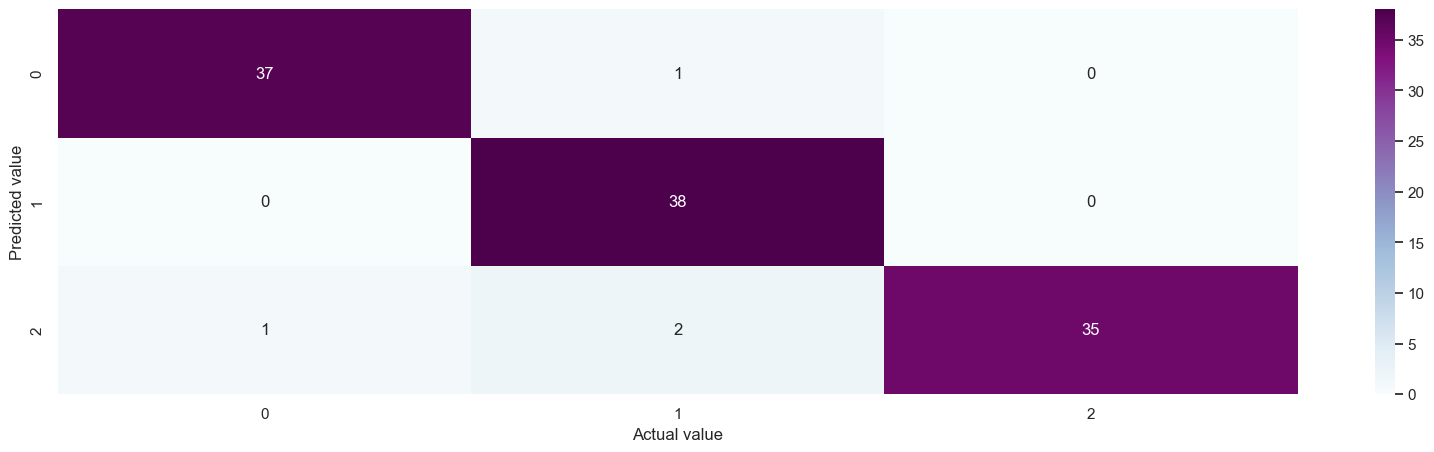

In [105]:
plt.figure(figsize = (20,5))
sns.heatmap(confusion_matrix(y_test , y_test_pred_dt1) , cmap = 'BuPu' , cbar = True , annot = True)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

#### Insights : we get 3 False Predictions and we get 97 % testing accuracy . means 3 values get missclassified.

#### Postpruning : Remove the unwanted branches(variables) after building model.

##### we select dt1(gini) model because it has high accuracy than entropy

##### Feature Importance score

In [106]:
dt1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.05848305,
       0.01738995, 0.47361247, 0.        , 0.        , 0.        ,
       0.45051453])

In [107]:
f_score = pd.DataFrame({'Feature Importance score':pd.Series(dt1.feature_importances_) , 'Features':pd.Series(x.columns)})

In [108]:
f_score

,Feature Importance score,Features
0,0.000000,Region
1,0.000000,Island
2,0.000000,Stage
3,0.000000,Clutch Completion
4,0.058483,Culmen Length (mm)
5,0.017390,Culmen Depth (mm)
6,0.473612,Flipper Length (mm)
7,0.000000,Body Mass (g)
8,0.000000,Sex
9,0.000000,Delta 15 N (o/oo)


### OR

In [109]:
f = pd.DataFrame(index = x.columns , data = dt1.feature_importances_ , columns = ['Feature Importance Score'])

In [110]:
f

,Feature Importance Score
Region,0.000000
Island,0.000000
Stage,0.000000
Clutch Completion,0.000000
Culmen Length (mm),0.058483
Culmen Depth (mm),0.017390
Flipper Length (mm),0.473612
Body Mass (g),0.000000
Sex,0.000000
Delta 15 N (o/oo),0.000000


##### Insights : By visualising Feature Importance Score , we get to know there are some feature which score is zero means these features are not statically significant. so we drop that featuresin postpruning

#### There are five features like Region , Island , Stage , Sex ,  Delta 15 N (o/oo). which are zero so we drop it.

#### Building Decision Tree visualization

In [111]:
from sklearn.tree import plot_tree

In [112]:
z = ['Region', 'Island', 'Stage', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

##### Here I take entire data and build tree on it

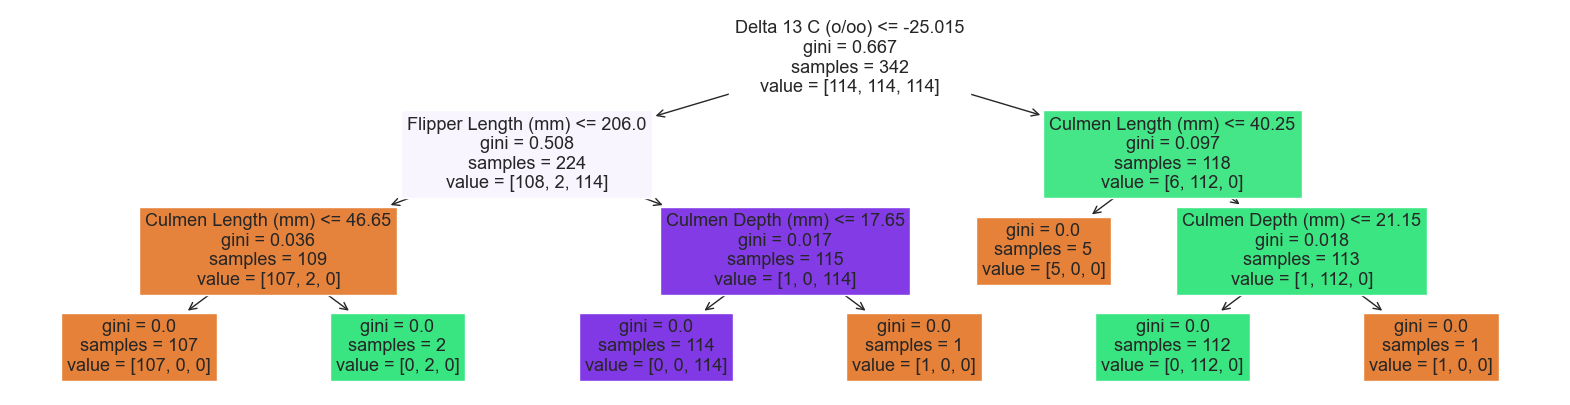

In [113]:
plt.figure(figsize = (20,5))
plot_tree(dt1 ,filled = True  , feature_names = z)
plt.show()

#### using Hyperparamter in DecisionTree Classifier to apply post pruning

In [114]:
prunned_tree = DecisionTreeClassifier(criterion='gini',max_depth = 3)
prunned_tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [115]:
y_pred_train_prunned = prunned_tree.predict(x_train)
y_pred_test_prunned = prunned_tree.predict(x_test)

##### Accuracy of test model of  prunned tree

In [116]:
print(accuracy_score(y_test , y_pred_test_prunned))

0.956140350877193


#### Classification report of prunned tree

In [117]:
print(classification_report(y_test , y_pred_test_prunned))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.93      1.00      0.96        38
           2       0.97      0.92      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### plot prunned Decision Tree

In [118]:
z = ['Region',
 'Island',
 'Stage',
 'Clutch Completion',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

### why island is there ?

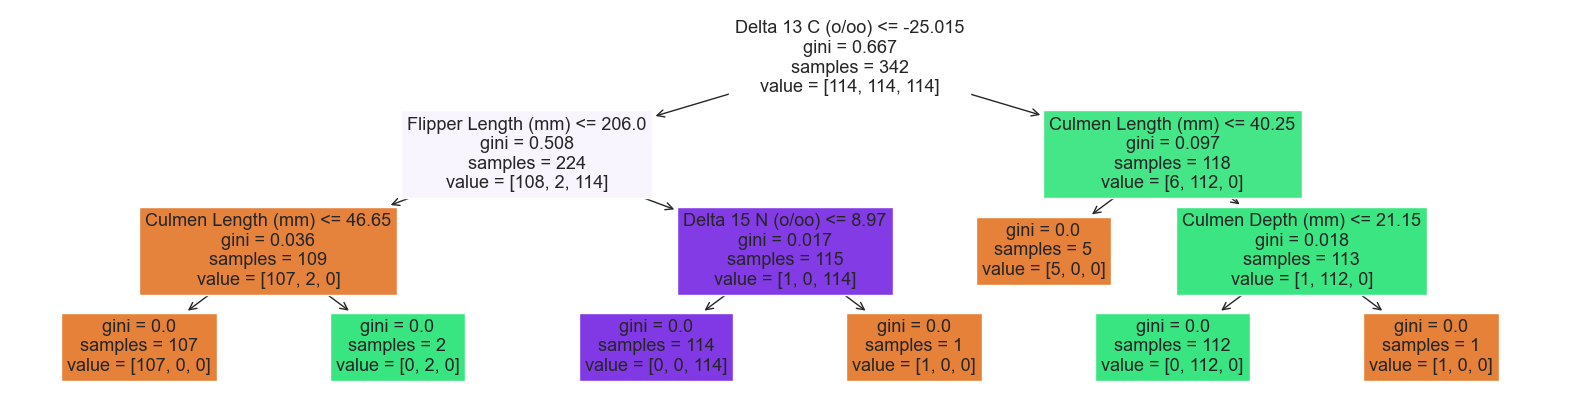

In [119]:
plt.figure(figsize = (20,5))
plot_tree(prunned_tree , filled = True , feature_names = list(x.columns))
plt.show()

#### Logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
logit = LogisticRegression()

#### Train logistic model

In [122]:
logit.fit(x_train , y_train)

LogisticRegression()

In [123]:
y_train_pred_logit = logit.predict(x_train)
y_test_pred_logit = logit.predict(x_test)

##### Accuracy score of training model of logistic 

In [124]:
accuracy_score(y_train , y_train_pred_logit)

1.0

##### Accuracy score of testing model of logistic 

In [125]:
accuracy_score(y_test , y_test_pred_logit)

0.9912280701754386

### Cross validation of logistic model

In [126]:
cs_logit = cross_val_score(logit , x_train , y_train , cv = 10)

In [127]:
cs_logit

array([1.        , 1.        , 1.        , 0.94117647, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.97058824])

#### Avg accuracy of logistic model

In [128]:
cs_logit.mean()

0.9911764705882353

#### Max accuracy of logistic model

In [129]:
cs_logit.max()

1.0

#### Insights : we reducing training accuracy of logistic model is 0.9911764705882353

### BaggingClassifier

In [131]:
from sklearn.ensemble import BaggingClassifier

In [132]:
bagging = BaggingClassifier()

#### Train the bagging model

In [134]:
bagging.fit(x_train , y_train)

BaggingClassifier()

#### Prediction of bagging

In [135]:
y_train_pred_bag = bagging.predict(x_train)
y_test_pred_bag = bagging.predict(x_test)

##### Accuracy of training model of bagging

In [139]:
training_accuracy_bag = accuracy_score(y_train , y_train_pred_bag)

In [140]:
training_accuracy_bag

0.9970760233918129

##### Accuracy of testing model of bagging

In [142]:
testing_accuracy_bag = accuracy_score(y_test , y_test_pred_bag)

In [143]:
testing_accuracy_bag

0.9649122807017544

##### RandomForestClassifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf = RandomForestClassifier(criterion='gini',n_estimators=200)

##### Train the RandomForest model

In [147]:
rf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=200)

##### Prediction of RandomForestClassifier on train and test data

In [148]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

##### Training Accuracy of RandomForest

In [151]:
training_accuracy_rf = accuracy_score(y_train , y_train_pred_rf)

In [152]:
training_accuracy_rf 

1.0

##### Testing Accuracy of RandomForest

In [154]:
testing_accuracy_rf = accuracy_score(y_test , y_test_pred_rf)

In [155]:
testing_accuracy_rf

0.9824561403508771

##### Insights : we get training accuracy 100 % and testing accuracy 98.2456 % of RandomForest.

#####                                 and

#####            we get training accuracy 99.70 % and testing accuracy 96.49 % of BaggingClassifier.

#####            means we get RandomForest better than baggingclassifier

####             we have training accuracy is 100 % but by cross validation . we will reduce it

### K Fold Cross Validation

In [156]:
from sklearn.model_selection import cross_val_score

##### We are doing cross validation on training data only . not for testing data

In [157]:
cs = cross_val_score(rf , x_train , y_train , cv = 10)

In [158]:
cs

array([0.97142857, 0.97142857, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

##### Mean of vaidation

In [159]:
cs.mean()

0.9942857142857143

##### Max of validation 

In [160]:
cs.max()

1.0

#### Insights : we get training accuracy by validation is 99.428 %. which is very good

#####  Insights : we get training accuracy after vaidation is 99.428 %  and we have already testing accuracy 98.2456 % of RandomForest.which is also better than BaggingClassifier and DTree.(becuase BaggingClassifier has  training accuracy 99.70 % and testing accuracy 96.49 % of BaggingClassifier.  ).   so thats why RandomForest is very best